In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rc("font",family='KaiTi')
%matplotlib inline


In [2]:
# 加载数据
trade_src =pd.read_csv('tianchi_mum_baby_trade_history.csv')
baby_src = pd.read_csv('tianchi_mum_baby.csv')


In [3]:
df_trade = pd.read_csv('tianchi_mum_baby_trade_history.csv')
df_baby = pd.read_csv('tianchi_mum_baby.csv')

In [4]:
print(trade_src.head(10))
print(len(trade_src))
print(len(baby_src))
print('*'*30)
baby_src.head(10)



     user_id   auction_id  category_2  category_1  buy_mount       day
0  786295544  41098319944    50014866    50022520          2  20140919
1  532110457  17916191097    50011993          28          1  20131011
2  249013725  21896936223    50012461    50014815          1  20131011
3  917056007  12515996043    50018831    50014815          2  20141023
4  444069173  20487688075    50013636    50008168          1  20141103
5  152298847  41840167463   121394024    50008168          1  20141103
6  513441334  19909384116    50010557    50008168          1  20121212
7  297411659  13540124907    50010542    50008168          1  20121212
8   82830661  19948600790    50013874          28          1  20121101
9  475046636  10368360710      203527          28          1  20121101
29971
953
******************************


,user_id,birthday,gender
0,2757,20130311,1
1,415971,20121111,0
2,1372572,20120130,1
3,10339332,20110910,0
4,10642245,20130213,0
5,10923201,20110830,1
6,11768880,20120107,1
7,12519465,20130705,1
8,12950574,20090708,0
9,13735440,20120323,0


In [5]:
# print(df_trade.columns)
print(df_baby.dtypes)
df_trade.dtypes

user_id     int64
birthday    int64
gender      int64
dtype: object


user_id       int64
auction_id    int64
category_2    int64
category_1    int64
buy_mount     int64
day           int64
dtype: object

In [6]:
# 将日期格式转化为Python日期格式
# df_trade['day']=pd.to_datetime(df_trade.day.astype('str'))
df_trade['day']=pd.to_datetime(df_trade['day'].astype('str'))
print(df_trade.head(10))
# df_baby['birthday']=pd.to_datetime(df_baby.birthday.astype('str'))
df_baby['birthday']=pd.to_datetime(df_baby['birthday'].astype('str'))
df_baby.head(10)

     user_id   auction_id  category_2  category_1  buy_mount        day
0  786295544  41098319944    50014866    50022520          2 2014-09-19
1  532110457  17916191097    50011993          28          1 2013-10-11
2  249013725  21896936223    50012461    50014815          1 2013-10-11
3  917056007  12515996043    50018831    50014815          2 2014-10-23
4  444069173  20487688075    50013636    50008168          1 2014-11-03
5  152298847  41840167463   121394024    50008168          1 2014-11-03
6  513441334  19909384116    50010557    50008168          1 2012-12-12
7  297411659  13540124907    50010542    50008168          1 2012-12-12
8   82830661  19948600790    50013874          28          1 2012-11-01
9  475046636  10368360710      203527          28          1 2012-11-01


,user_id,birthday,gender
0,2757,2013-03-11,1
1,415971,2012-11-11,0
2,1372572,2012-01-30,1
3,10339332,2011-09-10,0
4,10642245,2013-02-13,0
5,10923201,2011-08-30,1
6,11768880,2012-01-07,1
7,12519465,2013-07-05,1
8,12950574,2009-07-08,0
9,13735440,2012-03-23,0


In [7]:
# 增加年月日
df_trade['year']=df_trade['day'].dt.year
df_trade['quarter']=df_trade['day'].dt.quarter
df_trade['month']=df_trade['day'].dt.month
df_trade.head(10)

,user_id,auction_id,category_2,category_1,buy_mount,day,year,quarter,month
0,786295544,41098319944,50014866,50022520,2,2014-09-19,2014,3,9
1,532110457,17916191097,50011993,28,1,2013-10-11,2013,4,10
2,249013725,21896936223,50012461,50014815,1,2013-10-11,2013,4,10
3,917056007,12515996043,50018831,50014815,2,2014-10-23,2014,4,10
4,444069173,20487688075,50013636,50008168,1,2014-11-03,2014,4,11
5,152298847,41840167463,121394024,50008168,1,2014-11-03,2014,4,11
6,513441334,19909384116,50010557,50008168,1,2012-12-12,2012,4,12
7,297411659,13540124907,50010542,50008168,1,2012-12-12,2012,4,12
8,82830661,19948600790,50013874,28,1,2012-11-01,2012,4,11
9,475046636,10368360710,203527,28,1,2012-11-01,2012,4,11


In [8]:
print(df_trade['day'].describe())
print()
print(df_trade['buy_mount'].describe())
print()
df_trade= df_trade[(df_trade['buy_mount']>=1) & (df_trade['buy_mount']<=63*3) ]
df_trade.buy_mount.describe()

count                   29971
unique                    949
top       2014-11-11 00:00:00
freq                      454
first     2012-07-02 00:00:00
last      2015-02-05 00:00:00
Name: day, dtype: object

count    29971.000000
mean         2.544126
std         63.986879
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      10000.000000
Name: buy_mount, dtype: float64



count    29940.000000
mean         1.656179
std          5.026888
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        176.000000
Name: buy_mount, dtype: float64

In [9]:
print(df_trade.columns)
print('用户数：       ', df_trade['user_id'].nunique())
print('交易数：       ', df_trade['auction_id'].nunique())
print('商品一级类目数：', df_trade['category_1'].nunique())
print('商品二级类目数：', df_trade['category_2'].nunique())
print('总销量：       ', df_trade['buy_mount'].sum())


Index(['user_id', 'auction_id', 'category_2', 'category_1', 'buy_mount', 'day',
       'year', 'quarter', 'month'],
      dtype='object')
用户数：        29913
交易数：        28392
商品一级类目数： 6
商品二级类目数： 662
总销量：        49586


In [10]:
print(baby_src.count())
df_baby=df_baby[df_baby['gender']!=2 ]
print(df_baby.count())
df_baby


user_id     953
birthday    953
gender      953
dtype: int64
user_id     927
birthday    927
gender      927
dtype: int64


,user_id,birthday,gender
0,2757,2013-03-11,1
1,415971,2012-11-11,0
2,1372572,2012-01-30,1
3,10339332,2011-09-10,0
4,10642245,2013-02-13,0
...,...,...,...
948,2020957900,2014-04-30,0
949,2080304899,2010-07-13,0
950,2114469016,2014-04-16,0
951,2186831536,2014-05-19,1


In [11]:
df_baby.birthday.describe()
df_baby=df_baby[df_baby['birthday']>'2010-01-01']
# df_baby['year'] = df_baby['birthday'].dt.year
# df_baby['quarter'] = df_baby['birthday'].dt.quarter
# df_baby['month'] = df_baby['birthday'].dt.month
df_baby


,user_id,birthday,gender
0,2757,2013-03-11,1
1,415971,2012-11-11,0
2,1372572,2012-01-30,1
3,10339332,2011-09-10,0
4,10642245,2013-02-13,0
...,...,...,...
948,2020957900,2014-04-30,0
949,2080304899,2010-07-13,0
950,2114469016,2014-04-16,0
951,2186831536,2014-05-19,1


Int64Index([2012, 2013, 2014, 2015], dtype='int64', name='year') [ 6228 16179 24406  2773]


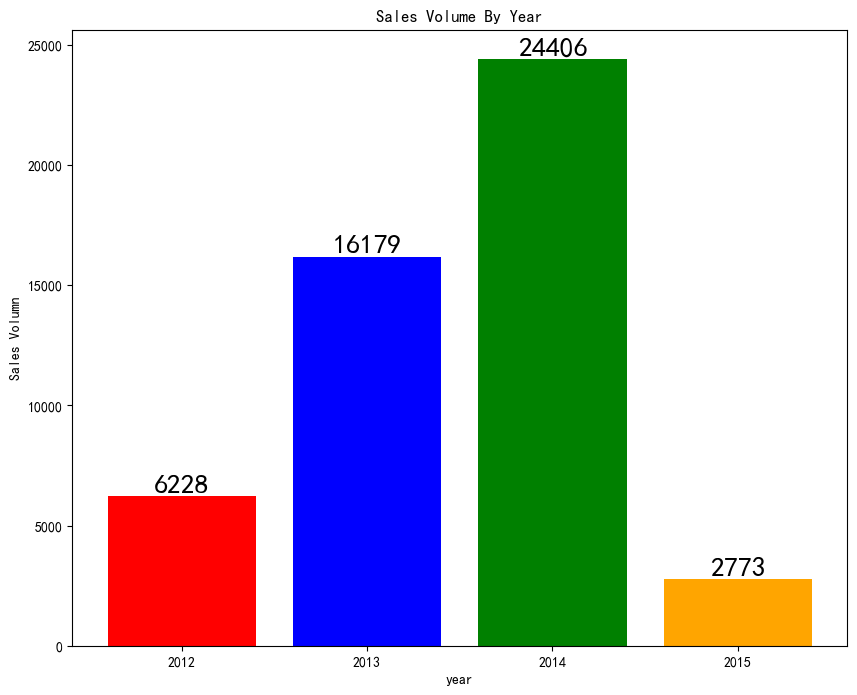

In [12]:
years_stats=df_trade.groupby('year').buy_mount.sum()
print(years_stats.index,years_stats.values)
plt.figure(figsize=(10,8))
colors = ['red', 'blue', 'green', 'orange']
plt.bar(years_stats.index, years_stats.values, color=colors)
plt.xticks(years_stats.index)
for i, v in enumerate(years_stats.values):
    plt.text(years_stats.index[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.xlabel('year')
plt.ylabel("Sales Volumn")
plt.title("Sales Volume By Year")
plt.show()

MultiIndex([(2012, 3),
            (2012, 4),
            (2013, 1),
            (2013, 2),
            (2013, 3),
            (2013, 4),
            (2014, 1),
            (2014, 2),
            (2014, 3),
            (2014, 4),
            (2015, 1)],
           names=['year', 'quarter']) [2582 3646 2767 4102 4326 4984 4476 6518 5738 7674 2773]


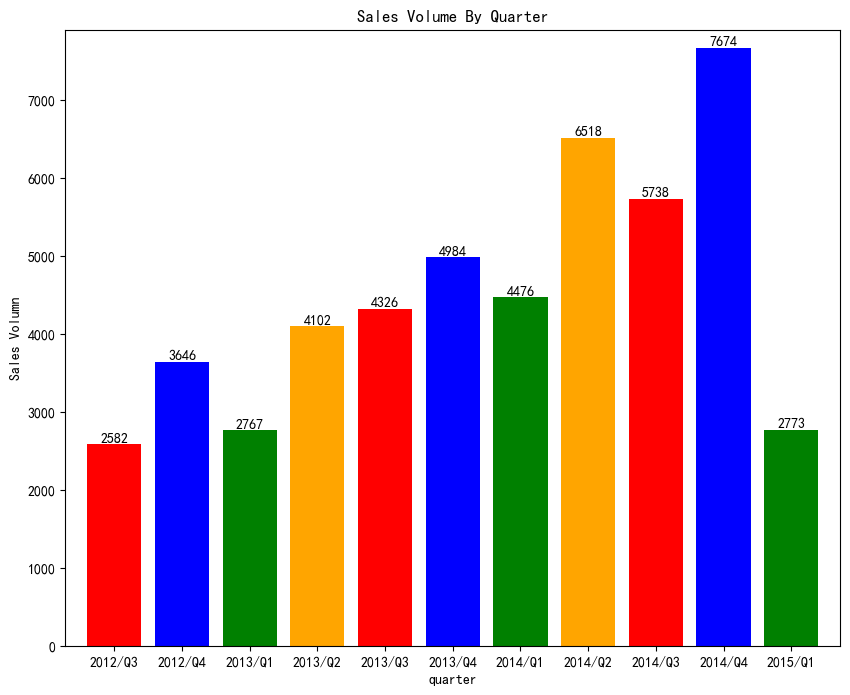

In [13]:
quarters_stats=df_trade.groupby(['year','quarter']).buy_mount.sum()
print(quarters_stats.index,quarters_stats.values)

plt.figure(figsize=(10,8))
datax = [str(idx[0]) + "/Q" + str(idx[1]) for idx in quarters_stats.index]
datay = quarters_stats.values
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax, datay,color=colors)
plt.xticks(datax)
plt.margins(0.03)
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom')
plt.xlabel('quarter')
plt.ylabel("Sales Volumn")
plt.title("Sales Volume By Quarter")
plt.show()

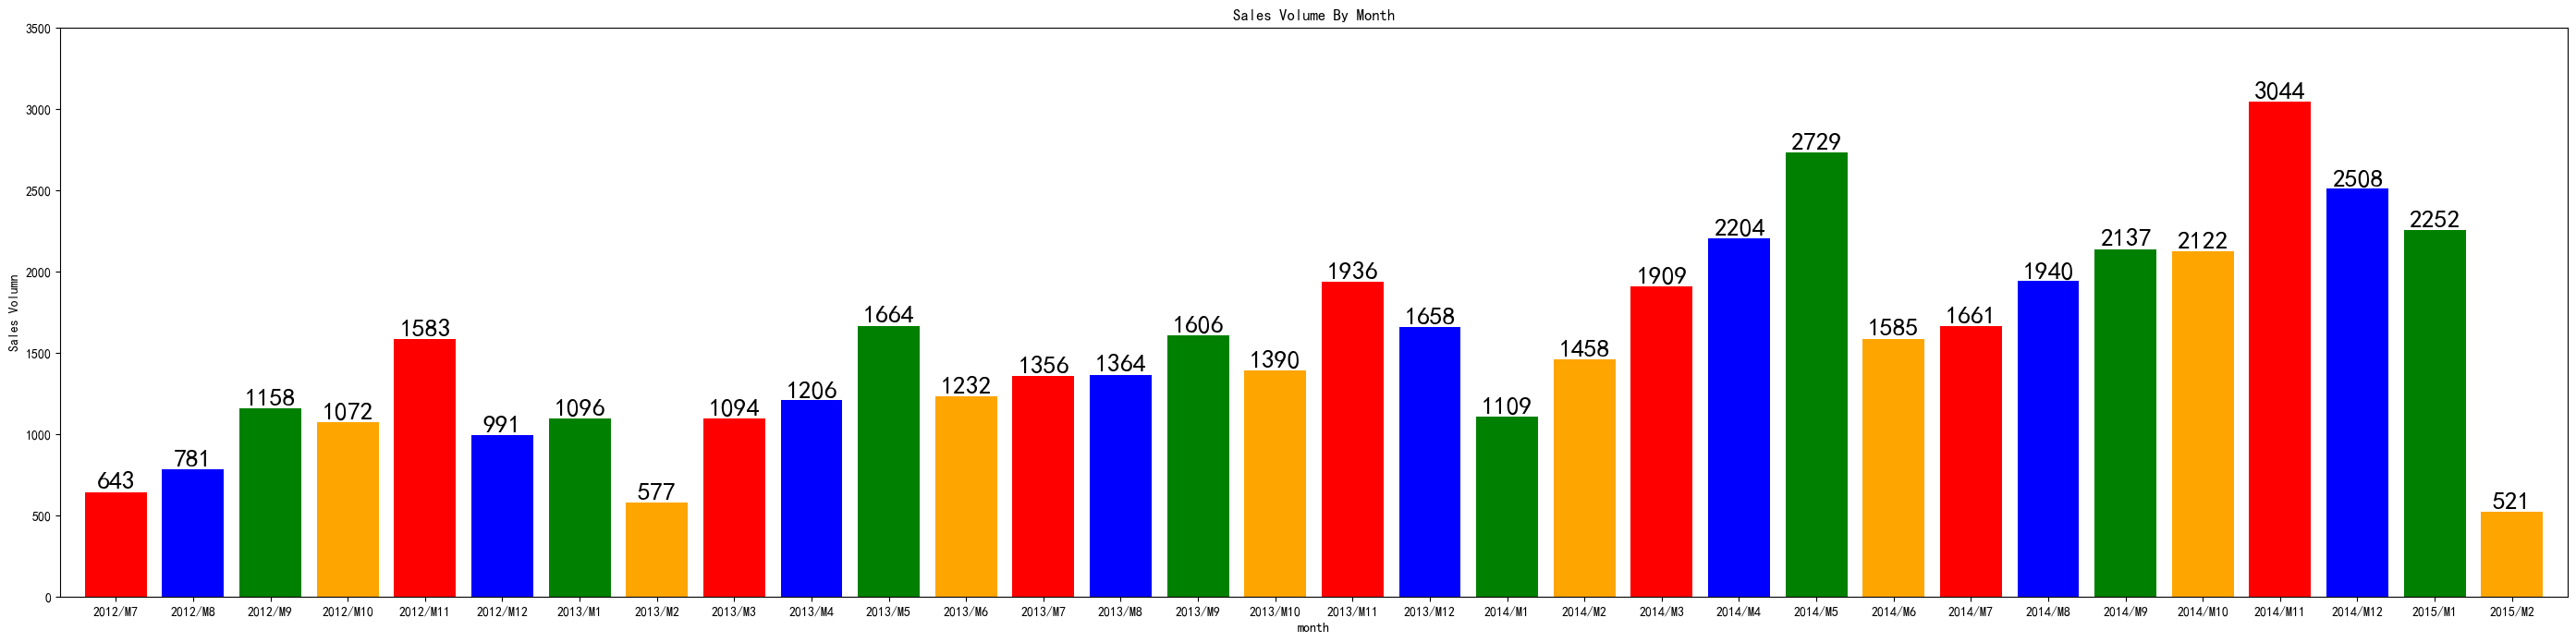

In [14]:
month_stats=df_trade.groupby(['year','month']).buy_mount.sum()
# print(month_stats)

plt.figure(figsize=(35,8))
datax = [str(idx[0]) + "/M" + str(idx[1]) for idx in month_stats.index]
datay = month_stats.values
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax, datay,color=colors)
plt.margins(0.01)
plt.xticks(datax)
plt.yticks(list(range(0,max(datay)+500,500)))
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.xlabel('month')
plt.ylabel("Sales Volumn")
plt.title("Sales Volume By Month")
plt.show()

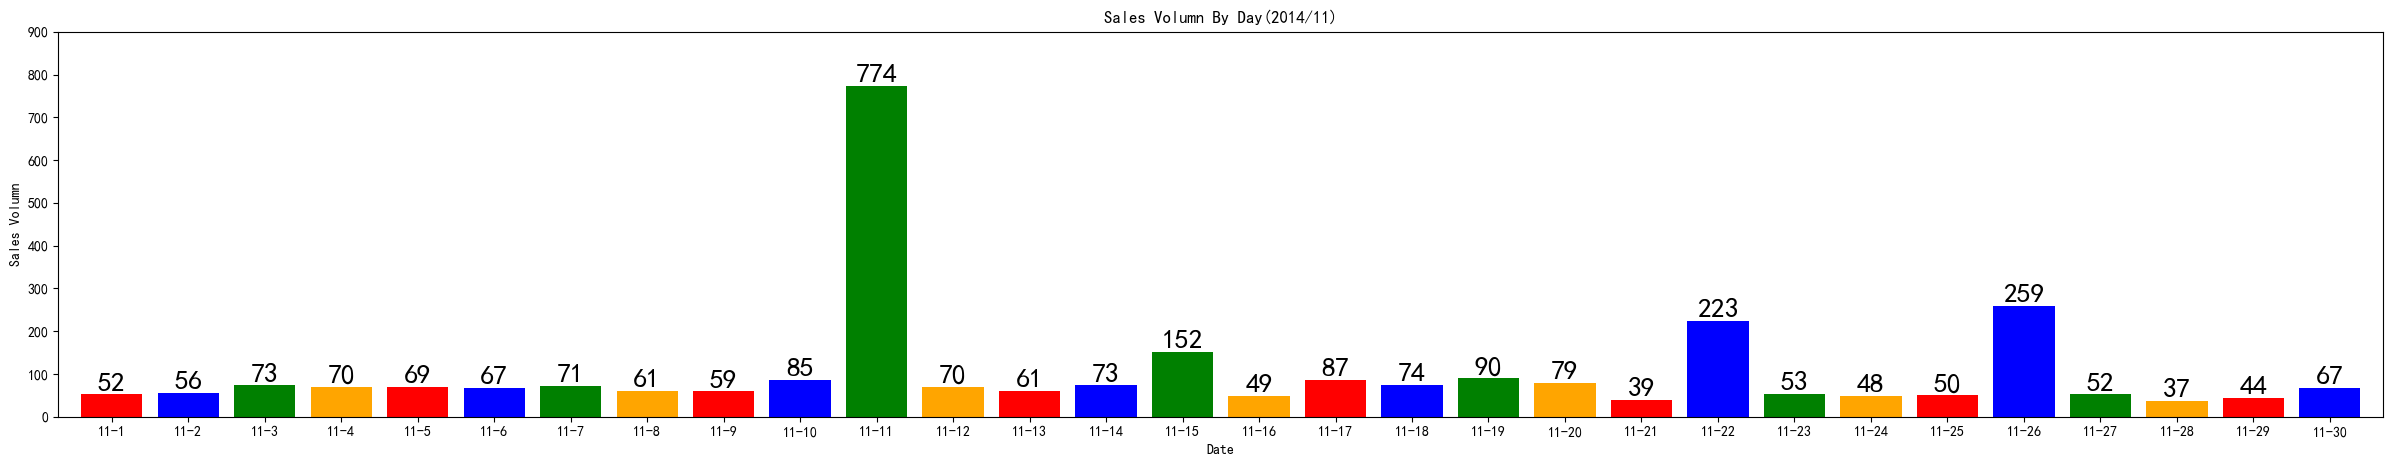

In [15]:
df_trade_201411 = df_trade[(df_trade.day >= '2014-11-01') & (df_trade.day <= '2014-11-30')]
day_stats = df_trade_201411.groupby(by='day')['buy_mount'].sum()

plt.figure(figsize=(30, 5))
datax = [str(idx.month) + '-' + str(idx.day) for idx in day_stats.index]
datay = [int(value) for value in day_stats.values]
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax,datay,color=colors)
plt.margins(0.01)
plt.yticks(list(range(0,max(datay)+130,100)))
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.title("Sales Volumn By Day(2014/11)")
plt.xlabel("Date")
plt.ylabel("Sales Volumn")
plt.show()

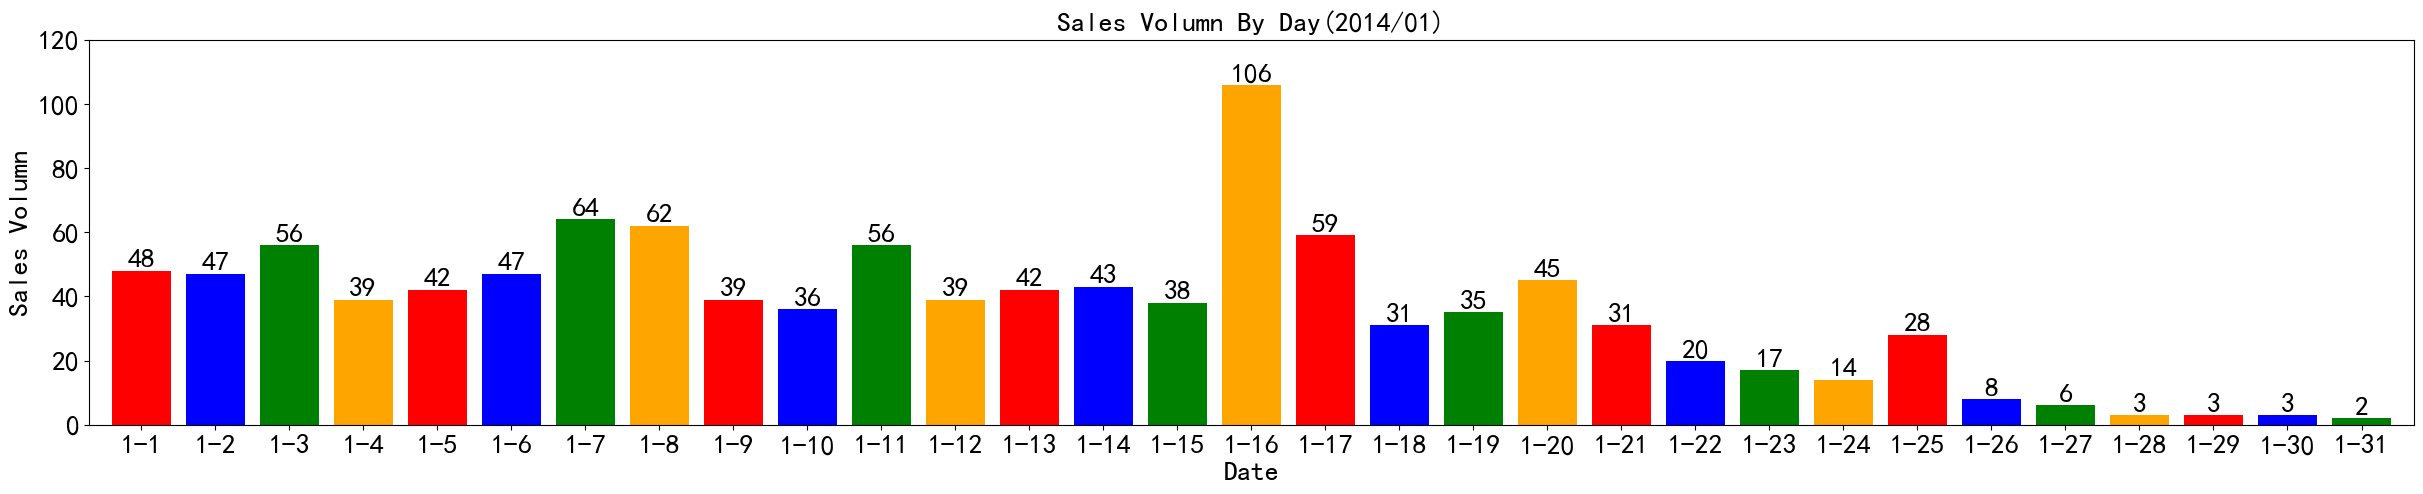

In [16]:
df_trade_201401 = df_trade[(df_trade.day >= '2014-01-01') & (df_trade.day <= '2014-01-31')]
day_stats = df_trade_201401.groupby(by='day')['buy_mount'].sum()

plt.figure(figsize=(30, 5))
datax = [str(idx.month) + '-' + str(idx.day) for idx in day_stats.index]
datay = [int(value) for value in day_stats.values]
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax,datay,color=colors)
plt.margins(0.01)
plt.xticks(fontsize=20)
plt.yticks(list(range(0,max(datay)+20,20)),fontsize=20)
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.title("Sales Volumn By Day(2014/01)",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Sales Volumn",fontsize=20)
plt.show()

### 类目分析

category_1
28           16321
38            3666
50008168     14944
50014815      9371
50022520      3045
122650008     2239
Name: buy_mount, dtype: int64 
 <class 'pandas.core.series.Series'>


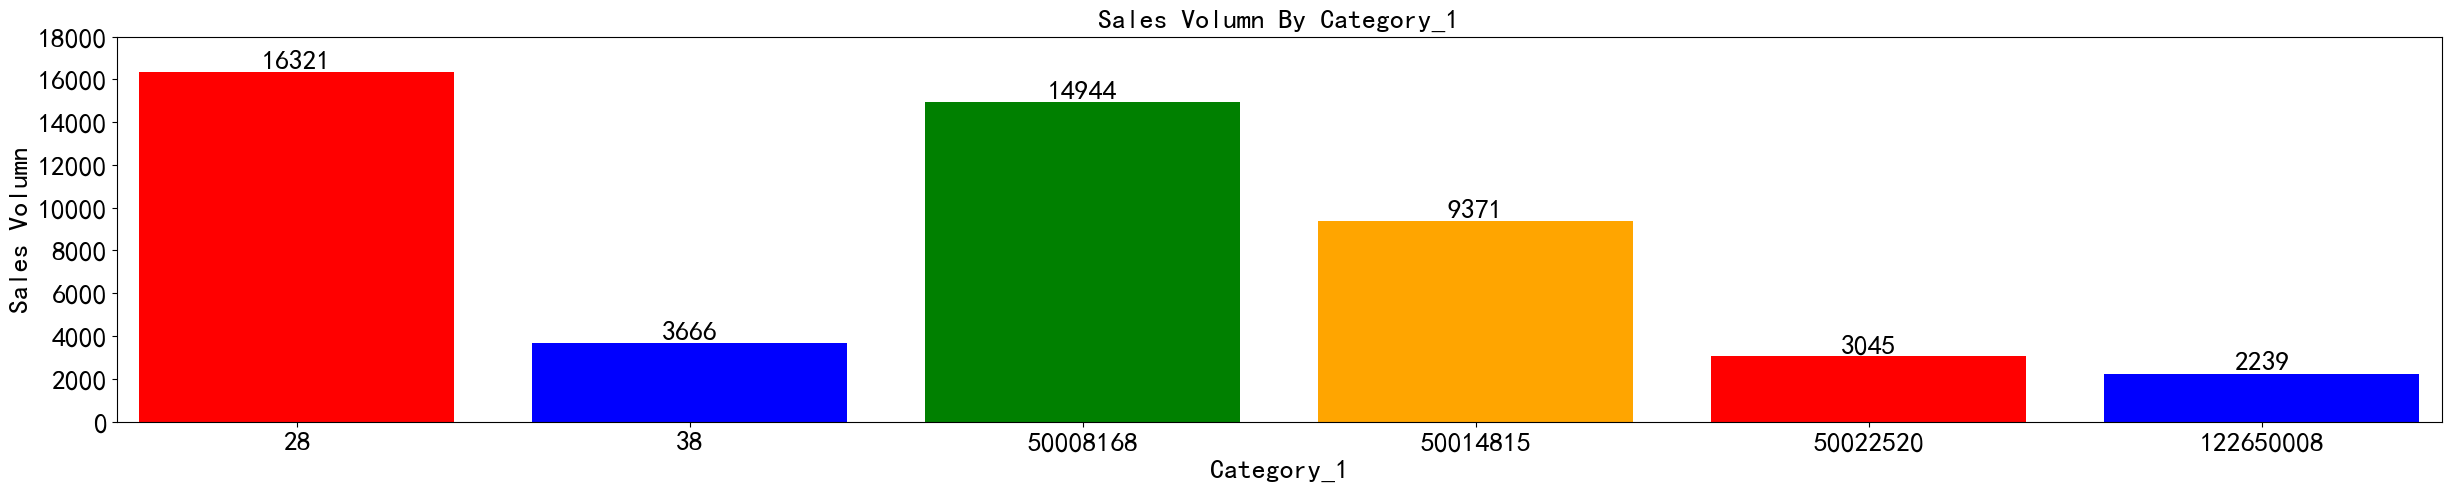

In [17]:
category1 = df_trade.groupby(by='category_1')['buy_mount'].sum()
print(category1,'\n',type(category1))
plt.figure(figsize=(30, 5))
datax = [str(idx) for idx in category1.index]
datay = [int(value) for value in category1.values]
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax,datay,color=colors)
plt.margins(0.01)
plt.xticks(fontsize=20)
plt.yticks(list(range(0,max(datay)+2000,2000)),fontsize=20)
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.title("Sales Volumn By Category_1",fontsize=20)
plt.xlabel("Category_1",fontsize=20)
plt.ylabel("Sales Volumn",fontsize=20)
plt.show()

#### 每个一级类别下共有多少个不同的二级类别

category_1
28           267
38            34
50008168      74
50014815     159
50022520     111
122650008     17
Name: category_2, dtype: int64 
 <class 'pandas.core.series.Series'>


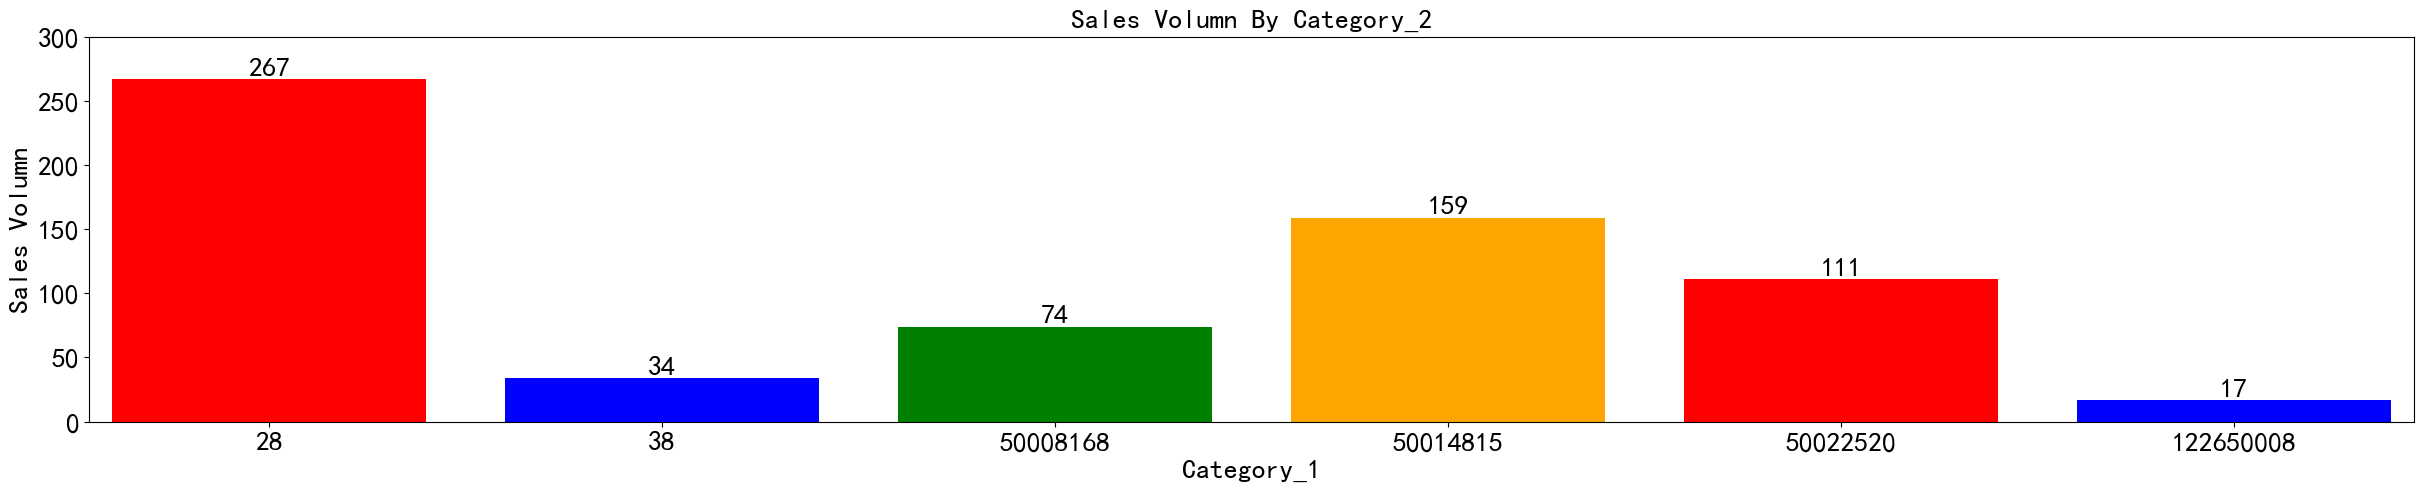

In [18]:
category2 = df_trade.groupby(by='category_1')['category_2'].nunique()
print(category2,'\n',type(category2))
plt.figure(figsize=(30, 5))
datax = [str(idx) for idx in category2.index]
datay = [int(value) for value in category2.values]
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax,datay,color=colors)
plt.margins(0.01)
plt.xticks(fontsize=20)
plt.yticks(list(range(0,max(datay)+50,50)),fontsize=20)
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.title("Sales Volumn By Category_2",fontsize=20)
plt.xlabel("Category_1",fontsize=20)
plt.ylabel("Sales Volumn",fontsize=20)
plt.show()

#### 每个一级类别下，平均每种二级类别购买的数量

category_1
28            61.127341
38           107.823529
50008168     201.945946
50014815      58.937107
50022520      27.432432
122650008    131.705882
dtype: float64 
 <class 'pandas.core.series.Series'>


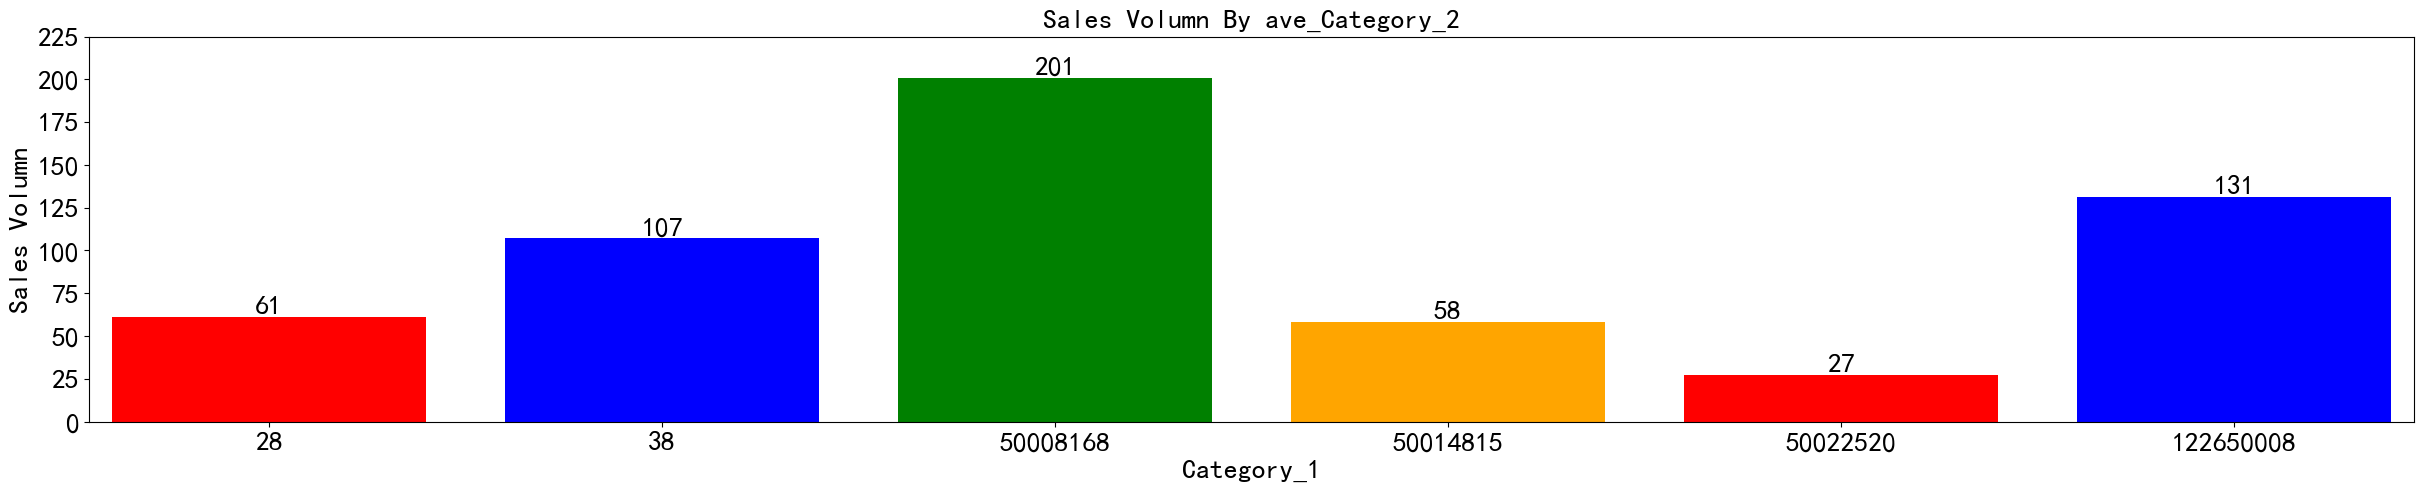

In [19]:
ave_category2 =df_trade.groupby('category_1')['buy_mount'].sum()/ df_trade.groupby(by='category_1')['category_2'].nunique()
print(ave_category2,'\n',type(ave_category2))
plt.figure(figsize=(30, 5))
datax = [str(idx) for idx in ave_category2.index]
datay = [int(value) for value in ave_category2.values]
colors = ['red', 'blue', 'green', 'orange']
plt.bar(datax,datay,color=colors)
plt.margins(0.01)
plt.xticks(fontsize=20)
plt.yticks(list(range(0,max(datay)+25,25)),fontsize=20)
for i, v in enumerate(datay):
    plt.text(datax[i], v, str(v), ha='center', va='bottom',fontsize=20)
plt.title("Sales Volumn By ave_Category_2",fontsize=20)
plt.xlabel("Category_1",fontsize=20)
plt.ylabel("Sales Volumn",fontsize=20)
plt.show()

### 性别分析

In [23]:
# 两个表拼接
df_merge = pd.merge(df_trade,df_baby)
print(df_trade.shape,df_baby.shape,df_merge.shape)
df_merge


(29940, 9) (798, 3) (801, 11)


,user_id,auction_id,category_2,category_1,buy_mount,day,year,quarter,month,birthday,gender
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2012,4,12,2011-01-05,1
1,377550424,15771663914,50015841,28,1,2012-11-23,2012,4,11,2011-06-20,1
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2012,3,9,2010-10-08,1
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012,4,11,2012-03-27,0
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2012,3,8,2010-08-25,0
...,...,...,...,...,...,...,...,...,...,...,...
796,379910739,12881672070,50012451,50008168,2,2012-09-04,2012,3,9,2011-02-26,0
797,685332320,12781785338,50018831,50014815,2,2013-06-01,2013,2,6,2012-02-23,0
798,389326420,17164967407,50006820,28,1,2014-09-16,2014,3,9,2013-07-17,0
799,1372572,16915013171,50008845,28,1,2013-03-27,2013,1,3,2012-01-30,1


##### 根据购买时间和生日计算购买时，孩子的年龄

In [28]:
df_merge['age']=round((df_merge['day']-df_merge['birthday'])/pd.Timedelta(days=365),2)
df_merge['age'].describe()

count    801.000000
mean       1.205106
std        1.267036
min       -2.090000
25%        0.250000
50%        0.980000
75%        2.080000
max        4.840000
Name: age, dtype: float64

##### 有小于0的年龄，表示父母提前买了，删除此类数据

In [31]:
df_merge = df_merge[df_merge['age']>0]
print(df_merge.age.describe())
df_merge.shape


count    663.000000
mean       1.537979
std        1.122517
min        0.020000
25%        0.590000
50%        1.250000
75%        2.300000
max        4.840000
Name: age, dtype: float64


(663, 12)

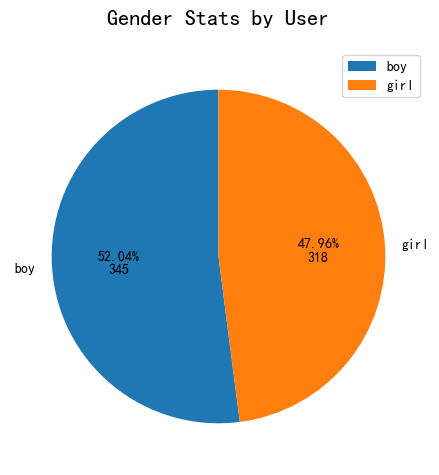

In [60]:
def compute_fraction(pct, allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)
gender_stats_by_user = df_merge.groupby(by = "gender")["user_id"].count()

labels=['boy','girl']
values=np.array([gender_stats_by_user[0], gender_stats_by_user[1]])
# pie函数的autopct参数传递函数详解：
# 具体来说，当你传递 lambda 函数 lambda x: func(x) 给 autopct 参数时，autopct 会调用这个 lambda 函数，
# 并传递每个扇形区域的百分比值作为参数 x，然后返回 func(x) 的结果作为相应扇形区域的百分比显示文本。
fig=plt.figure()
sub=fig.add_subplot(111)
sub.pie(values, labels=labels, startangle=90, autopct=lambda x: compute_fraction(x,values))
sub.legend()
fig.suptitle('Gender Stats by User',fontsize=16)
fig.tight_layout()
plt.show()

In [76]:
gender_stats_by_buy_mount = df_merge.groupby(by = ['gender','category_1'])['buy_mount'].sum()
category1_list = [50008168,38,28,50014815,50022520,122650008]
gender_stats_by_buy_mount

gender  category_1
0       28            112
        38             94
        50008168      154
        50014815      303
        50022520       14
        122650008      23
1       28             81
        38             37
        50008168      158
        50014815       87
        50022520       14
        122650008      19
Name: buy_mount, dtype: int64

##### 男孩的类别购买量

[154  94 112 303  14  23]
[50008168, 38, 28, 50014815, 50022520, 122650008]
gender  category_1
0       28            112
        38             94
        50008168      154
        50014815      303
        50022520       14
        122650008      23
1       28             81
        38             37
        50008168      158
        50014815       87
        50022520       14
        122650008      19
Name: buy_mount, dtype: int64


Text(0.5, 0.98, 'Sales Volumn by Boy')

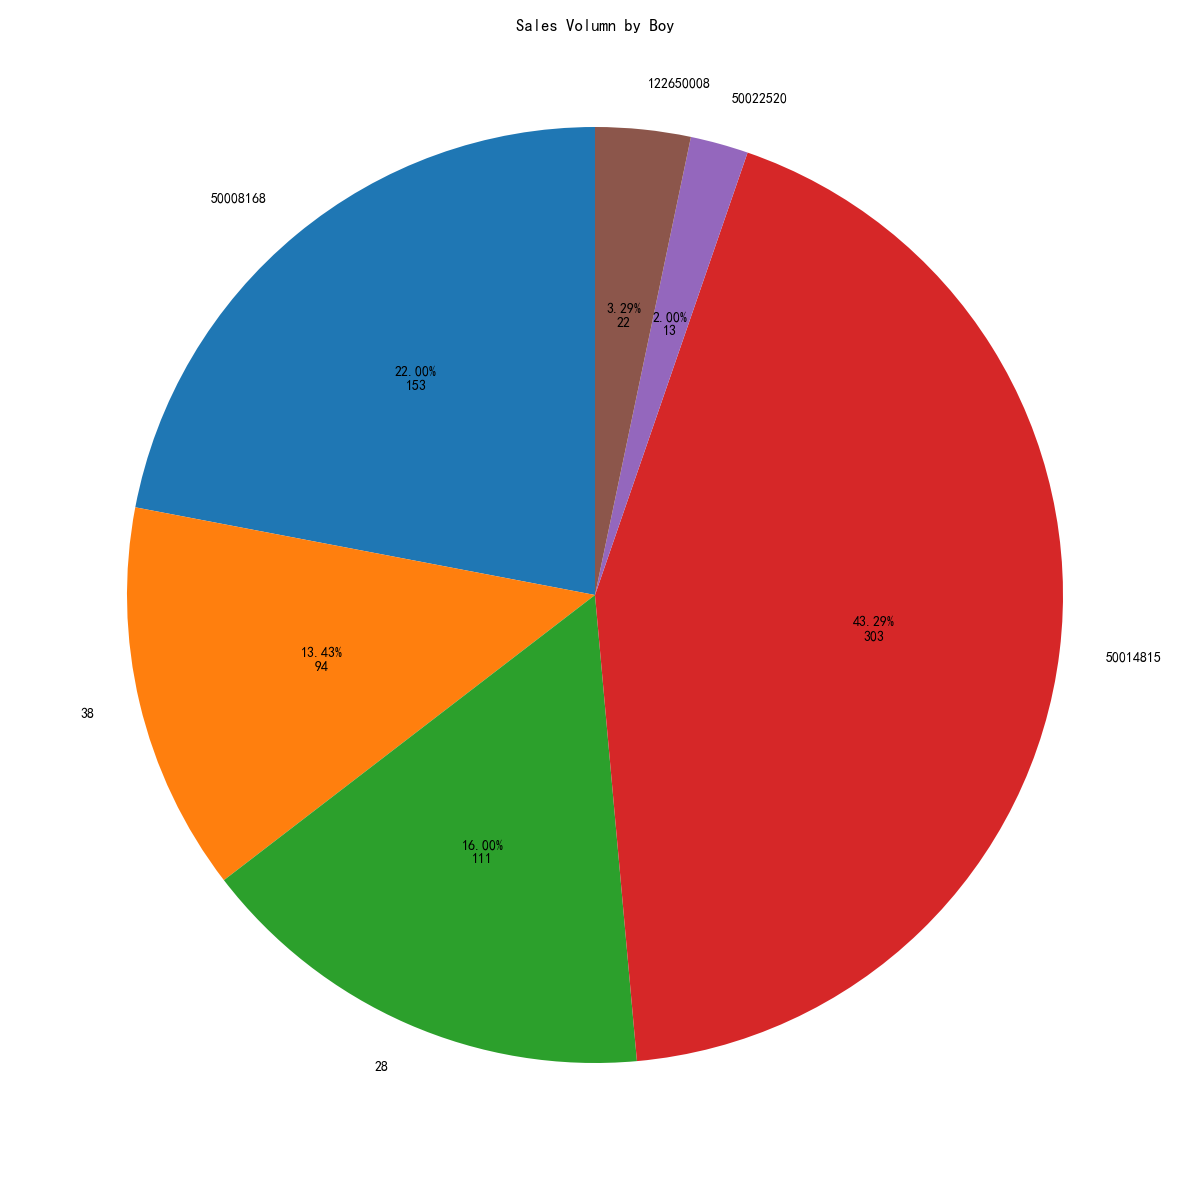

In [85]:
values = np.array([gender_stats_by_buy_mount.loc[0, category] for category in category1_list])
print(values)
print(category1_list)
print(gender_stats_by_buy_mount)
fig=plt.figure(figsize=(12,12))
sub=fig.add_subplot(111)
sub.pie(values, labels=category1_list, startangle=90, autopct=lambda x: compute_fraction(x,values))
plt.tight_layout()
fig.suptitle('Sales Volumn by Boy')

##### 女孩的类别购买量

[158  37  81  87  14  19]


Text(0.5, 0.98, 'Sales Volumn by Boy')

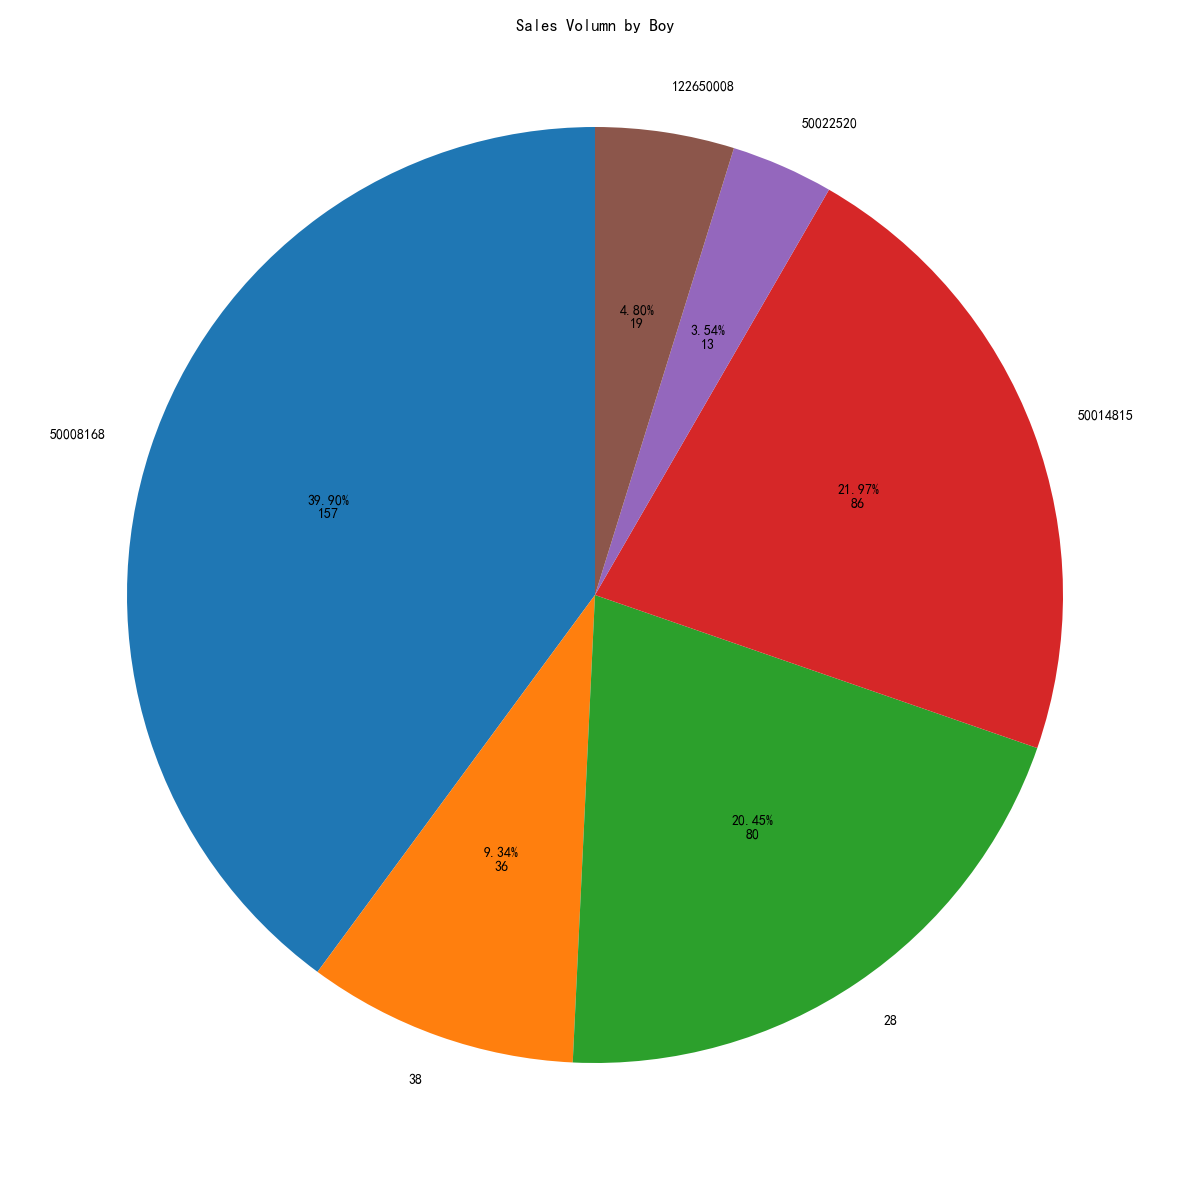

In [86]:
values = np.array([gender_stats_by_buy_mount.loc[1, category] for category in category1_list])
print(values)

fig=plt.figure(figsize=(12,12))
sub=fig.add_subplot(111)
sub.pie(values, labels=category1_list, startangle=90, autopct=lambda x: compute_fraction(x,values))
plt.tight_layout()
fig.suptitle('Sales Volumn by Boy')